## Xavier Obezo - Plotting Asteroids

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

#### The file `./Data/SDSS_MainBelt.csv` contains data on objects in the asteroid belt collected by the [Sloan Digital Sky Survey](http://www.sdss.org/).

The columns are:
- **`Name`** - Object name
- **`a`** - semi-major axis
- **`cA`** - SDSS a$^*$ color
- **`cI`** - SDSS i color (near infrared)
- **`cZ`** - SDSS z color (infrared)
- **`X`** - X position [au] - Sun-centered coords (10/29/2014)
- **`Y`** - Y position [au] - Sun-centered coords (10/29/2014)
- **`Z`** - Z position [au] - Sun-centered coords (10/29/2014)

## Read in the file `./Data/SDSS_MainBelt.csv`

In [2]:
table = pd.read_csv('./Data/SDSS_MainBelt.csv')

## The Color of the Asteroids 
- Make three (3) plots in one row
- In each panel, plot a histogram of the semi-major axis (`a`) for **all** of the asteroids.
- Bins = 100.
- Only show 2.0 AU < `a` < 3.6 AU
- In the first panel, overplot a histogram of `a` for C-Type asteroids only.
- In the second panel, overplot a histogram of `a` for S-Type asteroids only.
- In the third panel, overplot a histogram of `a` for V-Type asteroids only.
- In each panel, draw a vertical line at `a` = mean(`a`) for that type of asteroid.
- Adjust the color and transparency of the overplotted histograms so that it is easy to see.
- The asteroid types can be determined from their colors (see image below).
- Output size w:15in, h:5in
- Make the plot look nice (including clear labels)

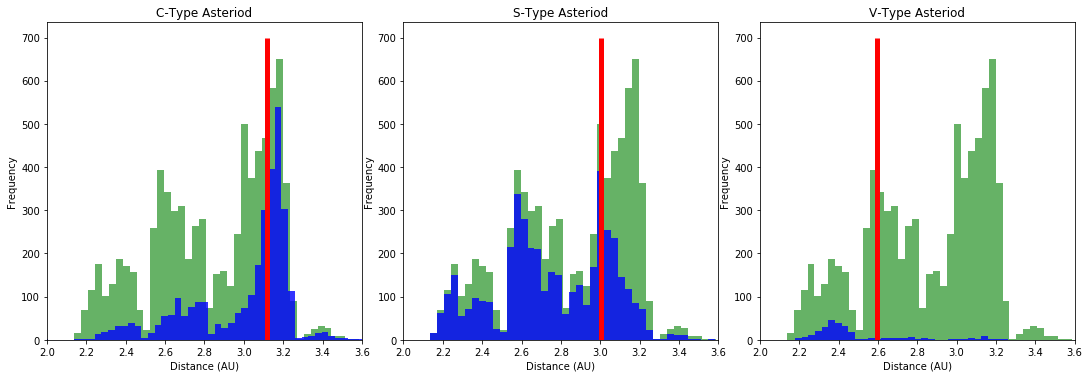

In [3]:
fig, ax = plt.subplots(1,3)                                  
fig.set_size_inches(15,5)

fig.tight_layout()

#Each type will have a range of cA that defines them.
#Each range will be a tuple of data so I can make a clean loop for it
#   Order:   C-type,   S-type,  V-type
cA_range = [[-0.30,0],[0,0.40],[0,0.40]]

#Same thing for the IZ range
iz_range = [[-0.80,0.60],[-0.15,0.60],[-0.80,-0.15]]

#Titles
titles = ['C-Type Asteriod','S-Type Asteriod','V-Type Asteriod']

for value in [0,1,2]:
    #Setting up each table for similar data
    ax[value].set_xlim(2.0,3.6)
    ax[value].set_xlabel('Distance (AU)')
    ax[value].set_ylabel('Frequency')
    ax[value].hist(table['a'], bins=100, facecolor='g',alpha=0.6);
    ax[value].set_title(titles[value])
    
    #Ranges
    iz = iz_range[value]
    cA = cA_range[value]
    
    #Masking and getting specific data
    mask = np.where( ((table['cA'] < cA[1]) & (table['cA'] > cA[0])) 
                     & ((table['cI']-table['cZ']<iz[1]) & (table['cI']-table['cZ']>iz[0])))
    current_data = table['a'][mask[0]]
    
    #Adding mean line
    meanNumber = np.mean(current_data)
    ax[value].vlines(meanNumber,  0, 700, color='r', linewidth=5); 
    
    #adding data to graph
    ax[value].hist(current_data, bins=100, facecolor='b', alpha = 0.8);


## The Position of the Asteroids 
- Make a 3D plot of X vs Y vs Z for the asteroids
- Orient the plot so you can see the 3D structure of the asteroid belt
- Output size w:9in, h:9in
- Make the plot look nice

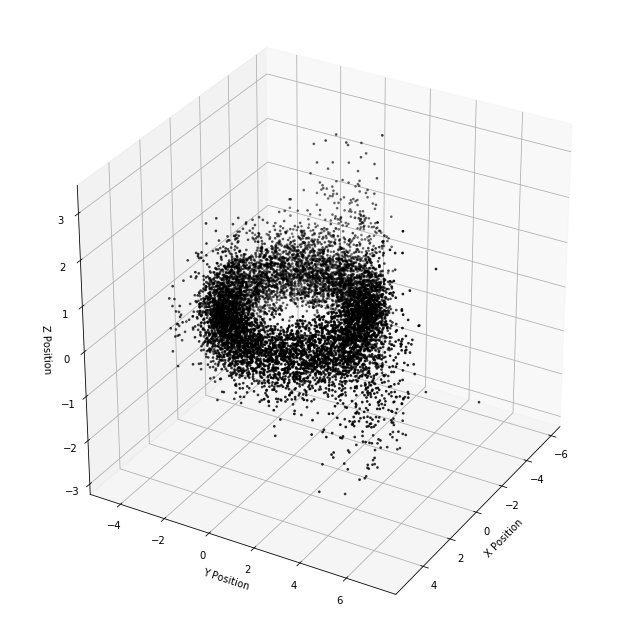

In [4]:
#Positions
x_pos = table['X']
y_pos = table['Y']
z_pos = table['Z']

# 3D setup
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
fig.set_size_inches(9,9)
fig.tight_layout()

# Labels
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')

# Display details
ax.scatter(x_pos, y_pos, z_pos, c = "black",s=3);
ax.view_init(azim = 30, elev = 30)

---

### Asteroid classes - SDSS Colors

---

<center><img src="images/Colors.jpg" width=600px></center>

### Due Wed Feb 20 - 1 pm
- `Make sure to change the filename to your name!`
- `Make sure to change the Title to your name!`
- `File -> Download as -> HTML (.html)`
- `upload your .html and .ipynb file to the class Canvas page`

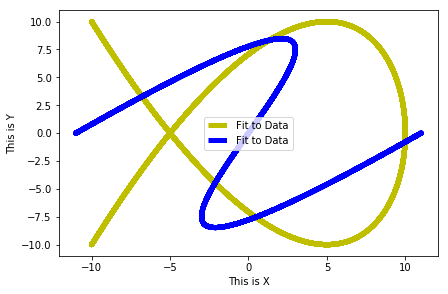

In [6]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(6,4)

fig.tight_layout()

ax.set_xlabel("This is X")
ax.set_ylabel("This is Y")

#First Function
t = np.arange(1,100,0.01)
x = 10*np.cos(2*t)
y = 10*np.sin(3*t)

#Second Function
i = 11*np.sin(t) * np.cos(2*t)
j = 11*np.cos(t) * np.sin(2*t)


ax.plot(x, y,
        linewidth=5, color='y', linestyle='--',
        label="Fit to Data")
ax.plot(i,j,
        linewidth=5, color='blue', linestyle='--',
        label="Fit to Data")

ax.legend(loc=0);